In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df_loan = pd.read_csv(r'C:\Kamal\Machine Learing and AI\Course Sessions\Statistical Inference\Exploratory Data Analysis\Case_Study_1\loan.csv' , low_memory = False)

In [5]:
df_loan.shape

(39717, 111)

In [6]:
# Set right column names

df_loan = df_loan.rename(columns = {c : c.replace(' ','').replace('.','_') for c in df_loan.columns})
print(df_loan.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


In [7]:
# Check potential unique value fields 
df_colunique = pd.Series({col: len(pd.unique(df_loan[col])) for col in df_loan}).reset_index()
df_colunique[df_colunique[0] == len(df_loan)]

# Remove the columns with all nulls ## potential unique 

,index,0
0,id,39717
1,member_id,39717
18,url,39717


In [8]:
# Strip all columns for leading and lagging spaces

df_loan = df_loan.applymap(lambda s : s.strip() if type(s) is str else s)

print(len(df_loan))
df_loan = df_loan[~(df_loan.loan_status == 'Current')]
print(len(df_loan))

39717
38577


In [9]:
# Remove the columns with all nulls 

df_loan_null = df_loan.isnull().sum(axis = 0).reset_index()
columns_to_remove = df_loan_null[df_loan_null[0] == len(df_loan) ]

print(len(df_loan.columns))

df_loan.drop(columns_to_remove['index'] , axis = 1 , inplace = True)

df_loan.columns

111


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='o

In [10]:
print(len(df_loan.columns))

56


In [11]:
# Delete unwanted columns : less data : No action here as no column has a fully null data 

df_loan_null = df_loan.isnull().sum(axis = 0).reset_index()
df_loan_null['Percent'] = df_loan_null[0] / len(df_loan) *100
df_loan_null[df_loan_null.Percent > 0].sort_values(by = 'Percent' , ascending = False).head()

,index,0,Percent
29,mths_since_last_record,35837,92.897322
28,mths_since_last_delinq,24905,64.559193
19,desc,12527,32.472717
10,emp_title,2386,6.185033
11,emp_length,1033,2.677761


In [12]:
# Delete unwanted columns :  repetition and unwanted data 

# url has no additional information 

print(df_loan[(df_loan.id.astype(str) != df_loan.url.apply(lambda s : s[s.index('=') + 1:len(s)].strip() if '=' in s else s ))])
print(df_loan.url.apply(lambda s : s[0 : s.index('=')].strip() if '=' in s else s ).unique())

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, collections_12_mths_ex_med, policy_code, application_type, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, pub_rec_bankruptcies, tax_liens]
Index: []

[0 rows x 56 columns]
['https://lendingclub.com/browse/loanDetail.action?loan_id']


In [13]:
# Remove string months from term 6 

df_loan.term = df_loan.term.apply(lambda s : s[0:s.index(' ')] if ' ' in s else s)
df_loan.term = pd.to_numeric(df_loan.term)
df_loan.term.head()

0    36
1    60
2    36
3    36
5    36
Name: term, dtype: int64

In [14]:
# Remove % sign from interest rate 

df_loan.int_rate = df_loan.int_rate.apply(lambda s : s[0:s.index('%')] if '%' in s else s)
df_loan.int_rate = pd.to_numeric(df_loan.int_rate)
df_loan.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

In [15]:
df_loan.emp_length.apply(lambda s : str(s).replace('years' , '').replace(' ' , '').replace('year' , '') ).head()
#df_loan.emp_length = pd.to_numeric(df_loan.emp_length)

0    10+
1     <1
2    10+
3    10+
5      3
Name: emp_length, dtype: object

In [16]:
# Delete blank rows 
# No blank rows identified worth to be deleted 

col_count = len(df_loan.columns)
df_loan[df_loan.isnull().sum(axis = 1) / col_count * 100  > 12 ]

(df_loan.isnull().sum(axis = 1)/ col_count * 100 ).max()

12.5

In [17]:
# Identify the columns with a 0 low variance and check it they can be removed 
df_var = df_loan.var().sort_values() == 0
columns_to_remove = df_var[df_var]
print(columns_to_remove.index)

if len(columns_to_remove.index) > 0 :
    df_loan.drop(columns_to_remove.index , axis = 1 , inplace = True)
    
print(len(df_loan.columns))

Index(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths',
       'acc_now_delinq', 'policy_code', 'out_prncp', 'out_prncp_inv',
       'collections_12_mths_ex_med'],
      dtype='object')
48


In [18]:
# Identify the columns with a no unique values across 
df_non_unique = pd.Series({col: len(pd.unique(df_loan[col])) for col in df_loan}).sort_values() == 1
columns_to_remove = df_non_unique[df_non_unique]
print(columns_to_remove.index)

if len(columns_to_remove.index) > 0 :
    df_loan.drop(columns_to_remove.index , axis = 1 , inplace = True)
print(len(df_loan.columns))

Index(['initial_list_status', 'application_type', 'pymnt_plan'], dtype='object')
45


In [19]:
# identify columns which have no impact on the business or which do not give additional information 

columns_to_remove = ['url' , 'collection_recovery_fee']
df_loan.drop(columns_to_remove , axis = 1 , inplace = True)
print(len(df_loan.columns))

43


In [20]:
df_loan.to_csv(r'C:\Kamal\Machine Learing and AI\Course Sessions\Statistical Inference\Exploratory Data Analysis\Case_Study_1\reduced_data_set.csv')

In [21]:
# Find missing values in the column and identify whether update is required 

# Delete unwanted columns : less data 

# Count number of nulls

df_loan_null = df_loan.isnull().sum(axis = 0).reset_index()
df_loan_null['Percent'] = df_loan_null[0] / len(df_loan) *100
df_loan_null[df_loan_null.Percent > 0].sort_values(by = 'Percent' , ascending = False).head()


(df_loan.isnull().sum(axis = 0) / len(df_loan)).sort_values(ascending = False)

mths_since_last_record    0.928973
mths_since_last_delinq    0.645592
desc                      0.324727
emp_title                 0.061850
emp_length                0.026778
pub_rec_bankruptcies      0.018068
last_pymnt_d              0.001840
revol_util                0.001296
title                     0.000285
last_credit_pull_d        0.000052
installment               0.000000
grade                     0.000000
int_rate                  0.000000
term                      0.000000
funded_amnt_inv           0.000000
funded_amnt               0.000000
loan_amnt                 0.000000
member_id                 0.000000
home_ownership            0.000000
annual_inc                0.000000
verification_status       0.000000
issue_d                   0.000000
loan_status               0.000000
sub_grade                 0.000000
addr_state                0.000000
purpose                   0.000000
zip_code                  0.000000
last_pymnt_amnt           0.000000
recoveries          

In [22]:
# Action on the columns with missing values 

# last payment date . The value is limited to loan status charged of . The business case will have to handled during analysis 
# Currently no action is taken on the same as it will not add any new information 
# No fix of values is required 

# No data filtering is required 


# Standardization of the values willbe handled as part of the univariate analysis 

In [23]:
# Perform Univariate Analysis

# Write Function to perform univariate analysis on categorical variables 

def uni_analysis_cat (x , summary = 0):
    sns.set(rc={'figure.figsize':(15,6)})
    f, axes = plt.subplots(1, 2)
       
    if(~summary):
        print(x.iloc[:,0].value_counts())
        sns.countplot( x = x.iloc[:,0], data = x , ax = axes[0])
        sns.countplot( x = x.iloc[:,0], hue = x.iloc[:,1] , data = x , ax = axes[1] )
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        print('****************************************************************************************************')
        ctab = pd.crosstab(x.iloc[:,1] ,x.iloc[:,0] , margins = False ,\
                           margins_name = 'Total' , normalize = True).round(4) * 100
        
        # plot the heat map for the cross tab 
        fm , main = plt.subplots()
        sns.heatmap(ctab ,cmap = 'Greens' , annot = True)
        

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64
****************************************************************************************************


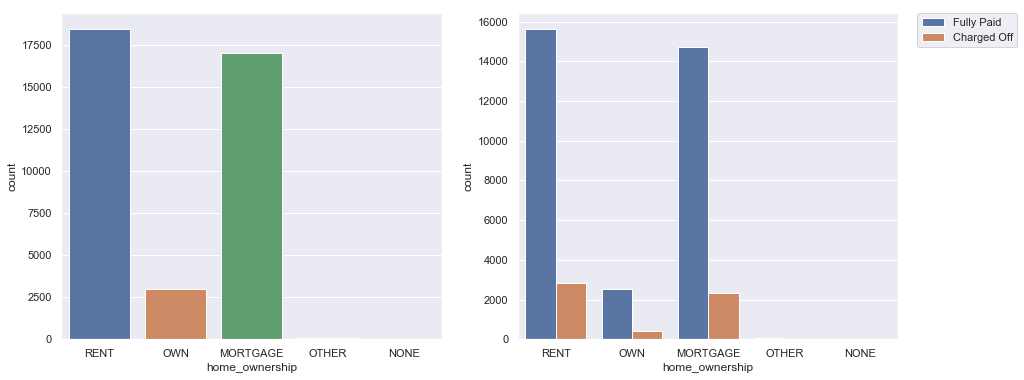

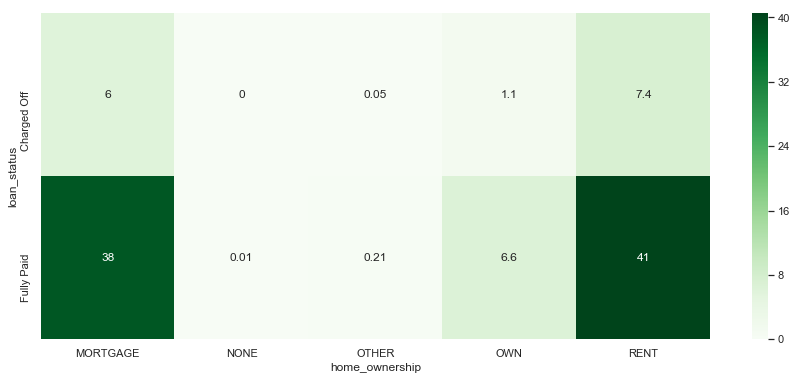

In [24]:
# Univariate analysis of Home ownership and comparison with home status

uni_analysis_cat(df_loan[['home_ownership' , 'loan_status']])

In [25]:
#uni_analysis_cat(df_loan[['inq_last_6mths' , 'loan_status']])

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64


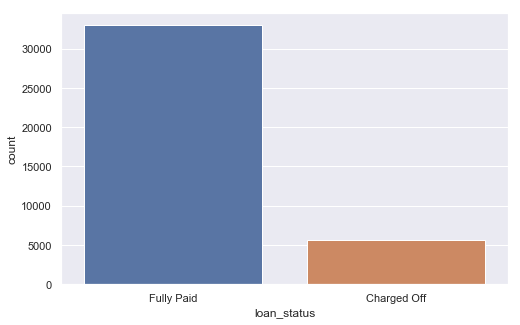

In [26]:
# Univariate analysis of Loan Status 

print(df_loan.loan_status.value_counts())

sns.set(rc={'figure.figsize':(8,5)})
sns.countplot( x = df_loan.loan_status , data = df_loan[['home_ownership' , 'loan_status']])

In [113]:
# Univariate analysis for quantitative variable 


def uni_analysis_num (x , type = 'r'):
    sns.set(rc={'figure.figsize':(15,6)})
    f, axes = plt.subplots(1, 2)
    
    print('Variable =' , x.columns[0])
    print('Mean Value ', x.iloc[:,0].mean() )
    print('Median ', x.iloc[:,0].median() )
   
    print('****************************************************************************************************')
    # print(x.iloc[:,0].value_counts())
    sns.boxplot( y = x.iloc[:,0], data = x , ax = axes[0])
    sns.violinplot( x = x.iloc[:,1] , y = x.iloc[:,0] , data = x , ax = axes[1], \
                   vert = True , inner = 'quartile'  )
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #print('****************************************************************************************************')
    #print(pd.crosstab(x.iloc[:,0] ,x.iloc[:,1] , margins = True , margins_name = 'Total' , normalize = True).round(4) * 100)

Variable = installment
Mean Value  322.46631801332103
Median  277.86
****************************************************************************************************


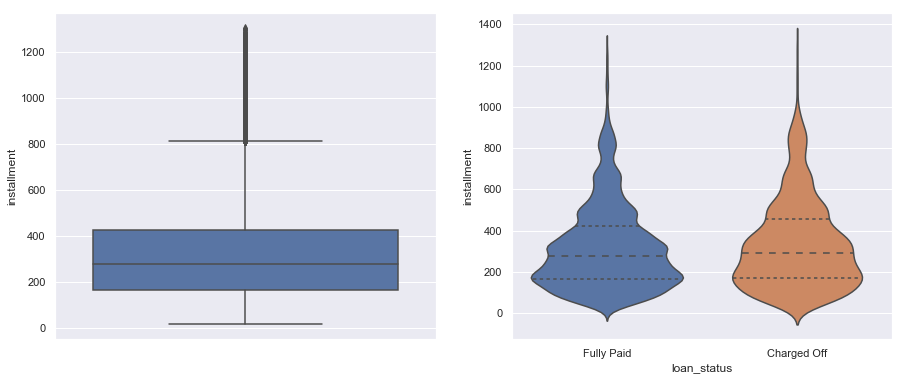

In [114]:
uni_analysis_num(df_loan[['installment' , 'loan_status']])

Variable = int_rate
Mean Value  11.932218679523526
Median  11.71
****************************************************************************************************


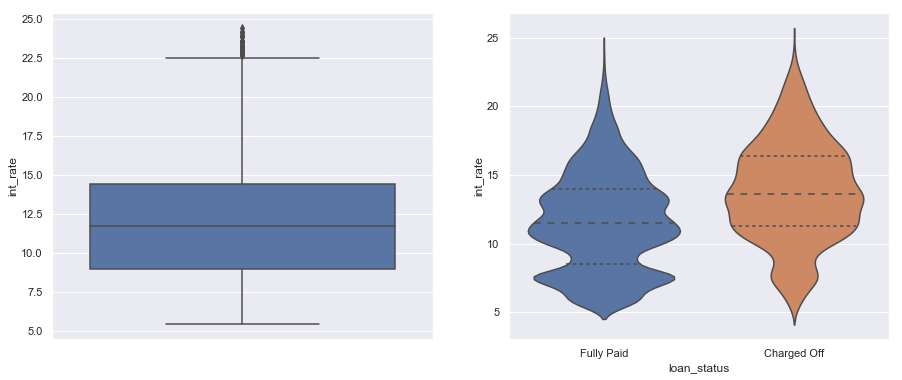

In [29]:
uni_analysis_num(df_loan[['int_rate' , 'loan_status']])

In [30]:
# In case of months , perform analysis based on both month and year 
# start with the setting the date type and then continue with the seperate analysis of Month and year 

df_loan.issue_d = pd.to_datetime(df_loan.issue_d , format = '%b-%y')

df_loan['issue_d_month'] = df_loan.issue_d.dt.month
df_loan['issue_d_year'] = df_loan.issue_d.dt.year

#Compress the data for the issue date to display the same in the consolidated form based on % 

df_issue_d = df_loan.loc[df_loan.loan_status == 'Charged Off' , ['issue_d_year' , 'issue_d_month' , 'loan_status']]\
            .groupby(['issue_d_year' , 'issue_d_month' , 'loan_status']).size().reset_index()

df_issue_d['status_percent'] = (df_issue_d[0]/sum(df_issue_d[0])).round(4)*100


12    4215
11    4006
10    3761
9     3498
8     3388
7     3351
6     3180
5     2919
4     2831
3     2691
1     2379
2     2358
Name: issue_d_month, dtype: int64
****************************************************************************************************


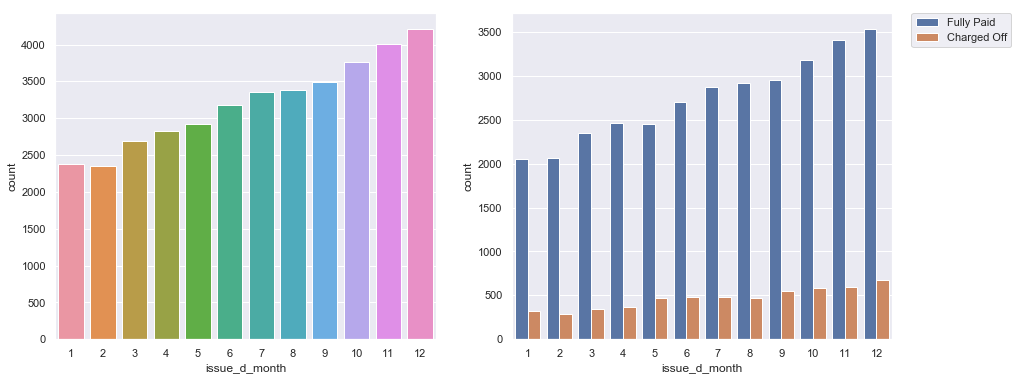

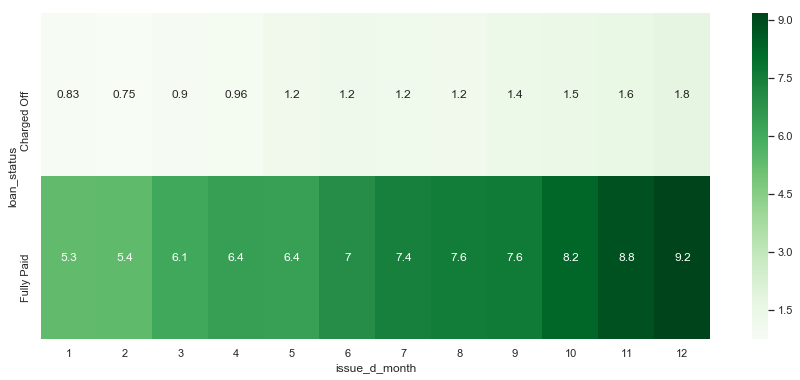

In [31]:
# Univariate analysis considering the month of the loan issue 
# Here we see that delinquency increases witht the later months when loans may have increase just to meet the target numbers

uni_analysis_cat(df_loan[['issue_d_month' , 'loan_status']] , summary = True)

2011    20516
2010    11532
2009     4716
2008     1562
2007      251
Name: issue_d_year, dtype: int64
****************************************************************************************************


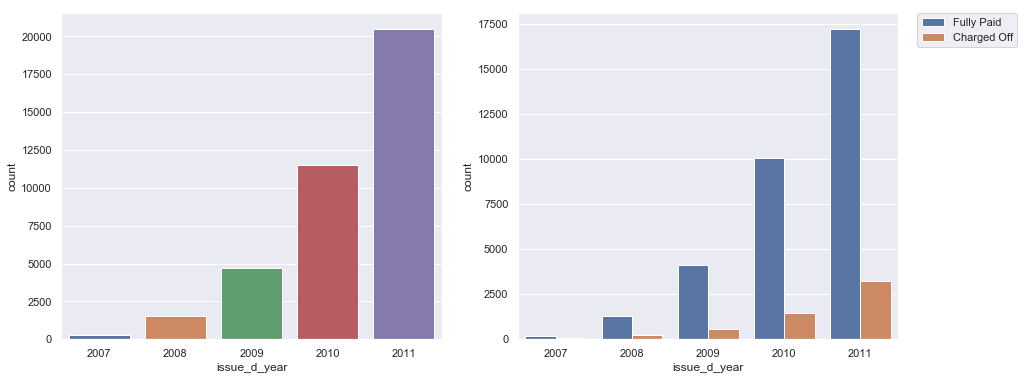

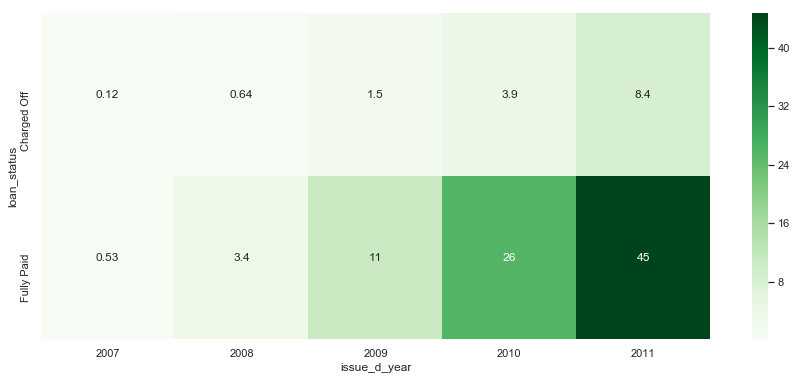

In [32]:
# Univariate analysis considering the month of the loan issue 
# Here we see that delinquency increases witht the later yeas for growth when loans may have increase just to meet the target numbers
# Year 2011 is particularly alarming 

uni_analysis_cat(df_loan[['issue_d_year' , 'loan_status']])

In [33]:
def bubble_plot(x , y , z ,percent):
    plt.rcParams.update({'font.size': 12})

    plt.figure(figsize=(10, 6))
    
    plt.scatter(x = x
                , y = y , 
                s = percent * 100,
                c = 'r',
               alpha = 0.8)

    
    for i in range(0,len(x)):
        plt.text(x[i] ,y[i], s= percent[i].round(2) , ha = 'left', va = 'center', fontsize = 12)

    plt.show()

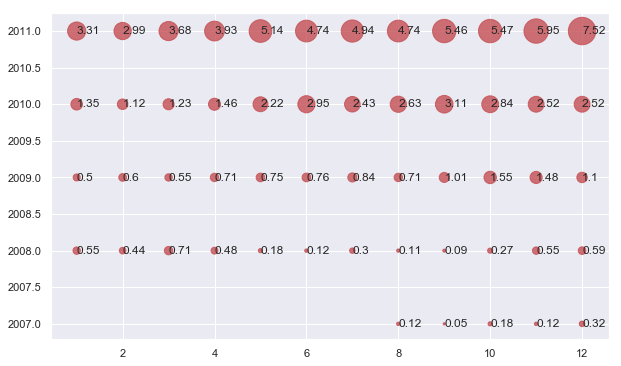

In [34]:
# Undertake the scatter plot for the charged Off variables

bubble_plot(df_issue_d.issue_d_month , df_issue_d.issue_d_year , df_issue_d.loan_status , df_issue_d.status_percent)

C:\Users\Kamalm\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


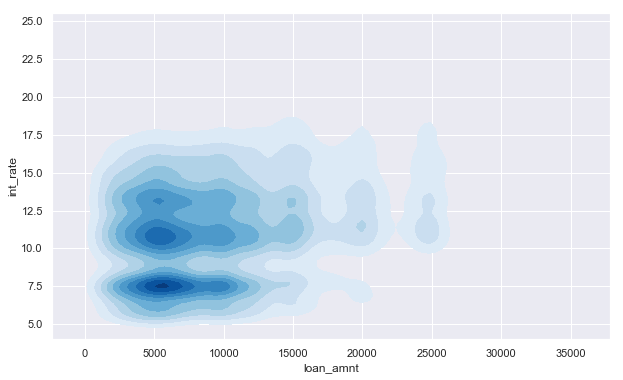

In [169]:
# Finding the correlation between the interest rate and the loan amount when the loan is Fully Paid 

# bi_analysis_num(df_loan.loc[df_loan.loan_status == 'Fully Paid' ,  ['loan_amnt' , 'int_rate']])

In [139]:
import scipy.stats as ss

# Create a function for a 2 set test using Pearsons's chi2 method
# https://stattrek.com/chi-square-test/independence.aspx

def chi2_cat_pearson(df):
    ctab = pd.crosstab(df.iloc[:,0] , df.iloc[:,1])
    stat , p , dof , expected = ss.chi2_contingency(ctab)
    
    print('p value is =', p)
    
    if ( p < 0.05):
        print('The 2 data sets are not independent of each other ')
    else:
        print('The 2 data sets are independent of each other')

In [140]:
# Create a function for a Pearsons chi sq test for categorical variable 

chi2_cat_pearson(df_loan[['home_ownership','loan_status']])

p value is = 0.00018011714098862449
The 2 data sets are not independent of each other 


In [143]:
# Function to perform t-test for 2 independent data sets 
# Not usable yet 

def independant_ttest(x , y ):
    stat , p = ss.ttest_ind(x, y , equal_var = False)
   
    print('p value = ' , p)
    
    if ( p < 0.05):
        print('The 2 sets of data differ significantly')
    else:
        print('We cannot state that the 2 sets of data differ significantly')

In [144]:
# Sample Implementation of the Independent T test (tested with installment and loan amount)

independant_ttest(df_loan[df_loan.loan_status == "Charged Off"].installment ,\
                  df_loan[df_loan.loan_status == "Fully Paid"].installment)

p value =  2.529850741459151e-07
The 2 sets of data differ significantly


Variable = loan_amnt
Mean Value  11047.02542966016
Median  9600.0
****************************************************************************************************


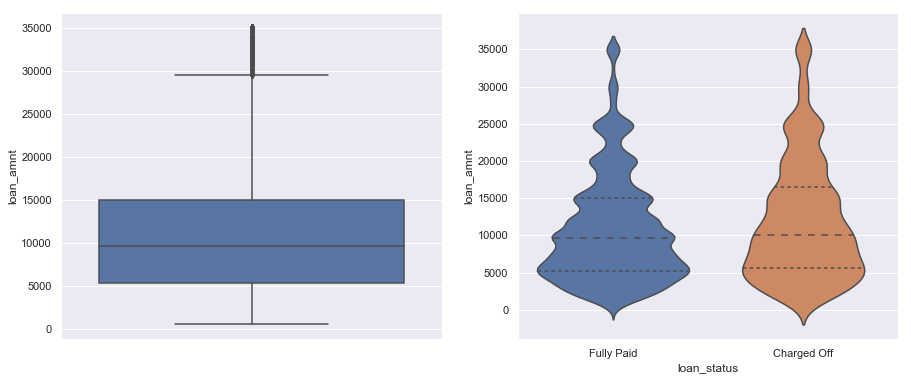

In [109]:
uni_analysis_num(df_loan[['loan_amnt' , 'installment']])

In [120]:
df_loan[['installment' , 'loan_status']].to_csv(r'C:\Kamal\Machine Learing and AI\Course Sessions\Statistical Inference\Exploratory Data Analysis\Case_Study_1\test.csv')

## Bivariate Analysis

In [207]:
# Bivariate analysis : Common function to perform correlation within data frame 

def bi_analysis_num(df):
    sns.set(rc={'figure.figsize':(15,6)})
    f, axes = plt.subplots(1, 2)
    
    #sns.heatmap(df.corr(), fmt='0.2f', annot=True , cmap = 'Greens')
    dfc = df[df.loan_status == 'Charged Off']
    dff = df[df.loan_status == 'Fully Paid']
    
    print('The correlation matrix is as below')
    print(df.corr())
    print('**********************************************************************************')
    
    sns.kdeplot(dfc.iloc[:,0] , dfc.iloc[:,1] ,  cmap="Reds", shade=True, shade_lowest=False , ax = axes[0])
    sns.kdeplot(dff.iloc[:,0] , dff.iloc[:,1] ,  cmap="Blues", shade=True, shade_lowest=False , ax = axes[1])

In [217]:
# Bivariate analysis for categorical variables : Common function to perform correlation within data frame 

def bi_analysis_cat(df):
    sns.set(rc={'figure.figsize':(15,6)})
   
    
    ct = pd.crosstab(df.iloc[:,1] , df.iloc[:,2] , margins = True , \
                     margins_name = 'Total' , normalize = True).round(4) * 100
    
    print('The summary table is as below')
    print(ct)
    print('**********************************************************************************')
       
    sns.violinplot( x = df.iloc[:,1] , y = df.iloc[:,0] ,  hue = df.iloc[:,2] , data = df , \
                   vert = True , inner = 'quartile' ,scale_hue = True , split = True , annot = True )

The correlation matrix is as below
          int_rate       dti
int_rate  1.000000  0.110913
dti       0.110913  1.000000
**********************************************************************************


C:\Users\Kamalm\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


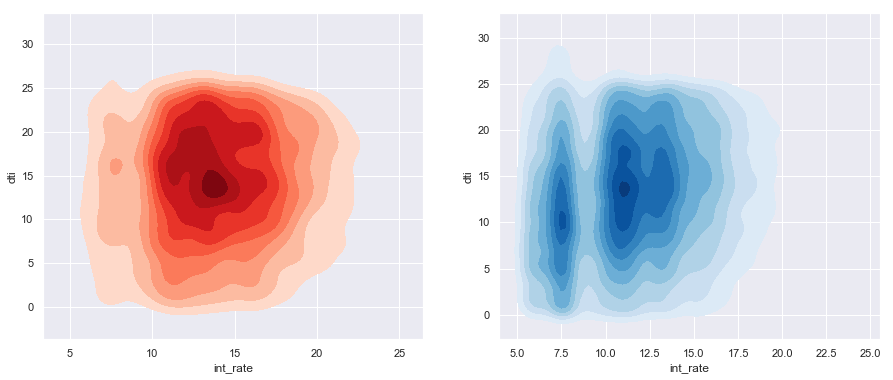

In [218]:
# Finding the correlation between the interest rate and the dti for loans which are paid and charged off

bi_analysis_num(df_loan[['int_rate' , 'dti' , 'loan_status']])

##### The dti by itself is significant parameter in deciding whether the applicant is granted the loan as identified in univariate analysis . However from above we observe that at same level of dti , if the loan has a higher interest rate ,there are high chances of default 

### Dti vs purpose

The summary table is as below
loan_status         Charged Off  Fully Paid   Total
purpose                                            
car                        0.41        3.47    3.89
credit_card                1.40       11.63   13.03
debt_consolidation         7.17       39.63   46.80
educational                0.15        0.70    0.84
home_improvement           0.90        6.55    7.45
house                      0.15        0.80    0.95
major_purchase             0.58        5.00    5.57
medical                    0.27        1.49    1.77
moving                     0.24        1.25    1.49
other                      1.64        8.38   10.02
renewable_energy           0.05        0.22    0.26
small_business             1.23        3.32    4.55
vacation                   0.14        0.83    0.97
wedding                    0.25        2.15    2.40
Total                     14.59       85.41  100.00
**********************************************************************************


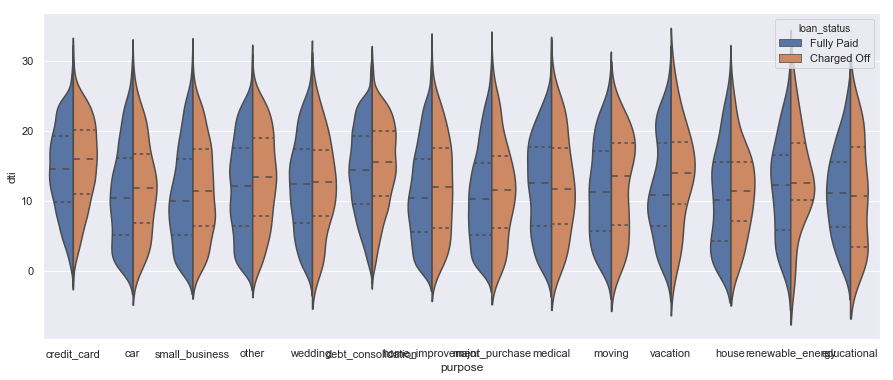

In [219]:
# Bivariate analysis of dti and purpose

bi_analysis_cat(df_loan[['dti' , 'purpose' , 'loan_status']])

The purpose for which loan is applied does indicate some chances for default. Some of the purposes have been identified as more risky ventures as compared to others . Analysing purpose alongwith dti, we see that loans taken for car , small business , home improvement are risky even at lower dti

### Dti vs home ownership 

The summary table is as below
loan_status     Charged Off  Fully Paid   Total
home_ownership                                 
MORTGAGE               6.03       38.09   44.12
NONE                   0.00        0.01    0.01
OTHER                  0.05        0.21    0.25
OWN                    1.15        6.56    7.71
RENT                   7.36       40.54   47.90
Total                 14.59       85.41  100.00
**********************************************************************************


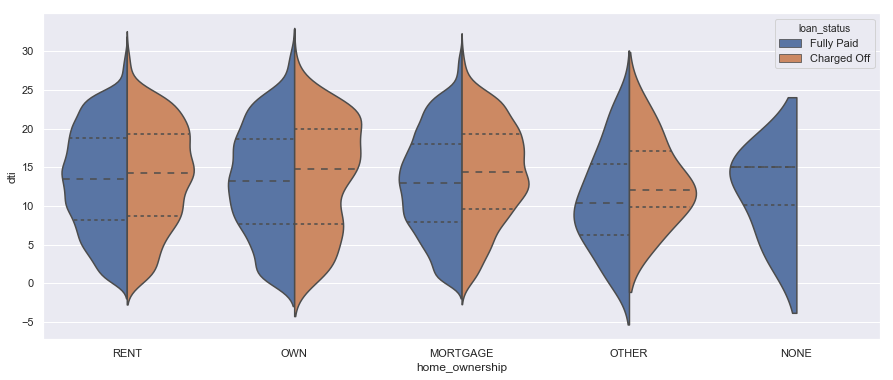

In [220]:
bi_analysis_cat(df_loan[['dti' , 'home_ownership' , 'loan_status']])

The type of home ownership do not show any significant difference on the final loan status. 

### dt vs inquiries in the last 6 months to understanding the availablity background information 

                     dti  inq_last_6mths
dti             1.000000        0.002178
inq_last_6mths  0.002178        1.000000
The summary table is as below
loan_status     Charged Off  Fully Paid   Total
inq_last_6mths                                 
0                      5.91       42.59   48.50
1                      4.35       23.29   27.63
2                      2.44       12.21   14.66
3                      1.60        6.13    7.73
4                      0.13        0.69    0.82
5                      0.07        0.30    0.37
6                      0.04        0.12    0.16
7                      0.03        0.06    0.09
8                      0.01        0.03    0.04
Total                 14.59       85.41  100.00
**********************************************************************************


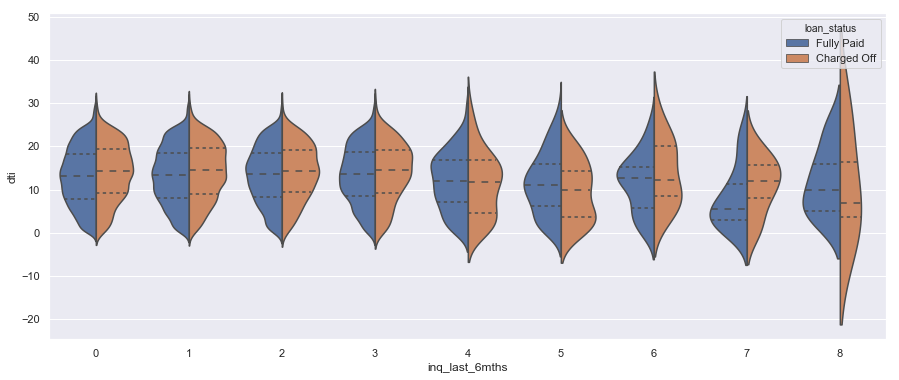

In [221]:
# Understanding the relation between dti and enquiries in last 6 months 

print(df_loan[['dti' , 'inq_last_6mths']].corr())

bi_analysis_cat(df_loan[['dti' , 'inq_last_6mths' , 'loan_status']])

As number of enquiries for loan increase the possiblity to default at lower dti increases . Thus number of enquiries is a good leading indicator for the tendency to borrow and default even with lower dtis. However since the correlation between enquiries and dti is low , it does nto indicate a 'credit seeking tendency'

### Funded amount invested vs past bankruptcies 

                 funded_amnt_inv  inq_last_6mths
funded_amnt_inv           1.0000         -0.0028
inq_last_6mths           -0.0028          1.0000
**************************************************************************************************88
The summary table is as below
loan_status           Charged Off  Fully Paid   Total
pub_rec_bankruptcies                                 
0.0                         13.57       82.09   95.67
1.0                          0.97        3.36    4.32
2.0                          0.01        0.01    0.01
Total                       14.54       85.46  100.00
**********************************************************************************


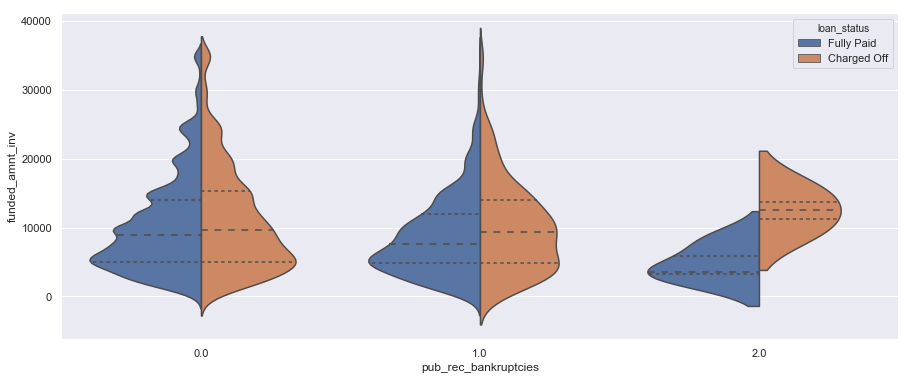

In [222]:
print(df_loan[['funded_amnt_inv' , 'inq_last_6mths']].corr())

print('**************************************************************************************************')

bi_analysis_cat(df_loan[['funded_amnt_inv' , 'pub_rec_bankruptcies' , 'loan_status']])

The correlation between funded amount invested and number of bankrupties is very low. Thus the members who invest in loan do not have enough information about the past bankrupties. 

Past bankruptcy is an established indicator of default . Transfer of the infromation to the investors can reduce the investment in risky loans 

### Funded amount vs dti

The correlation matrix is as below
                 funded_amnt_inv       dti
funded_amnt_inv         1.000000  0.070663
dti                     0.070663  1.000000
**********************************************************************************


C:\Users\Kamalm\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


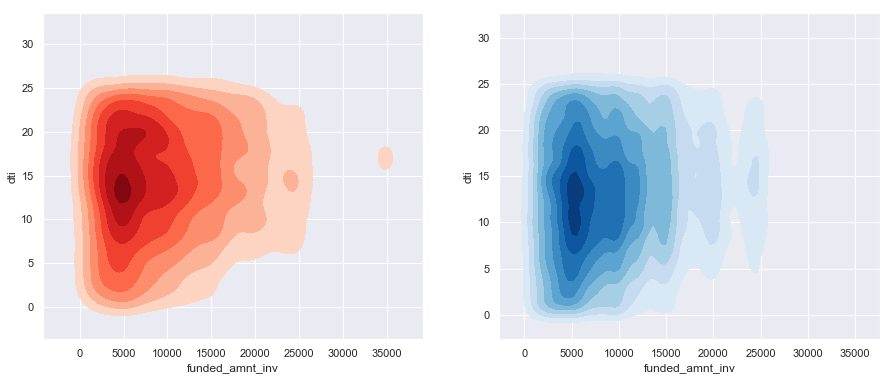

In [225]:
bi_analysis_num(df_loan[['funded_amnt_inv' , 'dti' , 'loan_status']])

It seems that Information of the dti not available to the investors since higher dti should ideally reduce the investment in the loan and thus serve as a leadfing indicator 